# 🐧 Penguins Rule in <span style="color:green">Green</span>

Using just the Orders table, return the count of orders that were shipped to each country:

\- The dataset should be sorted by the OrderCount from greatest to least

\- You should return 21 rows / countries, the picture below only shows first rows of the dataset

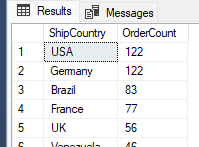

In [1]:
SELECT ShipCountry
      ,count(*) as 'OrderCount'
FROM Orders
GROUP BY ShipCountry
ORDER BY OrderCount DESC
;

(21 rows affected)

Total execution time: 00:00:00.055

ShipCountry,OrderCount
USA,122
Germany,122
Brazil,83
France,77
UK,56
Venezuela,46
Austria,40
Sweden,37
Canada,30
Mexico,28


--- 
Using just the Customers table, return a contact list for the customers

\- Return the fields you see in the picture below, alias the field names as shown

\- The customer list is comprised of only the customer in Canada and Mexico (you should return 8 customers)

\- Sort the dataset by Country first, then the Customer second (Customer is the CompanyName field)


**Hint**: This query will be used on a dashboard, so field names should be "user friendly" (i.e. including spaces)



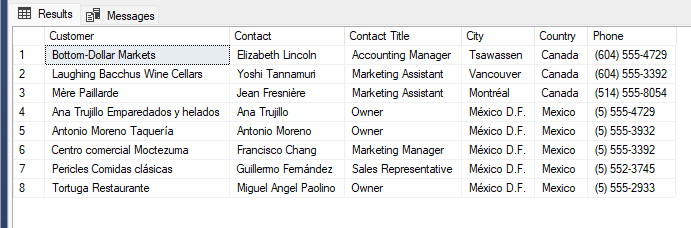

In [ ]:
SELECT CompanyName as 'Customer'
      ,ContactName as 'Contact'
      ,ContactTitle as 'Contact Title'
      ,City
      ,Country
      ,Phone
FROM [dbo].[Customers]
WHERE COUNTRY in ('Canada', 'Mexico')
ORDER BY Country, Customer
;

---   

Using just the Employees table, return all employees with the word "Sales" in their job title.

\- Order the results based on HireDate, from long tenured emmployees to newer employees

\- Create the derived field, "Employee" from the FirstName and LastName fields

\- Format the HireDate field as a Date type

\- See picture below

**Hint**: This query will be used on a dashboard, so field names should be "user friendly" (i.e. including spaces)  

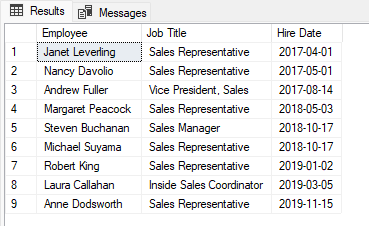

In [ ]:
SELECT FirstName + ' ' + LastName as 'Employee'
     ,Title as 'Job Title'
	 ,CAST(HireDate as DATE) as 'Hire Date'
FROM dbo.Employees
WHERE Title LIKE '%Sales%'
ORDER BY [Hire Date] ASC
;

---
Using just the Employees table, return a list of all Sales Representatives

\- Order the results based on HireDate, from long tenured employees to newer employees

\- Create the derived field, "Sales Rep" from the FirstName and LastName fields

\- Format the HireDate field as a Date type

\- See picture below

**Hint**: This query will be used on a dashboard, so field names should be "user friendly" (i.e. including spaces) 

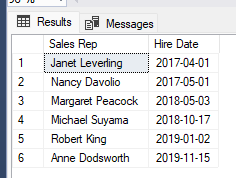

In [ ]:
SELECT FirstName + ' ' + LastName as 'Sales Rep'
	 ,CAST(HireDate as DATE) as 'Hire Date'
FROM dbo.Employees
WHERE Title = 'Sales Representative'
ORDER BY [Hire Date] ASC
;

--- 
Using just the Employees table, return the count for each Job Title

\- Order the results in alphabetical order for job title

\- See picture below

**Hint**: This query will be used on a dashboard, so field names should be "user friendly" (i.e. including spaces)  

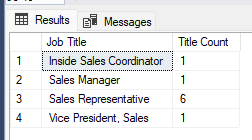

In [ ]:
SELECT Title as 'Job Title'
     ,count(*) as 'Title Count'
FROM dbo.Employees
GROUP BY Title
ORDER BY [Job Title] ASC
;


Using just the OrderDetails table, return the top 3 orders with the most line item counts:

\- The query should take into account if any ties within the top 3  

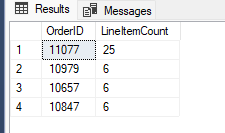

In [ ]:
SELECT TOP 3 with TIES OrderID as 'OrderID'
     , count(*) as 'LineItemCount'
FROM dbo.OrderDetails
GROUP BY OrderID
ORDER BY LineItemCount DESC
;

---
Using the Orders, OrderDetails, and Customers tables who are the top 5 customers in Sales for 2022 (based on the Order Date):

\- Sales is calculated using the UnitPrice, Quantity, and Discount fields as we have done in class.

\- Filtering on 2022 is based on the Order Date

\- Use CompanyName and alias it as 'Customer'

\- The query should take into account if any ties within the top 5

\- To get trailing zeroes with the rounded Sales Total you can first cast your Sales Total to type money, then round to 2 places

\- See picture below

  

**Hint**: This query will be used on a dashboard, so field names should be "user friendly" (i.e. including spaces)

      and rounding money values to two decimal places  

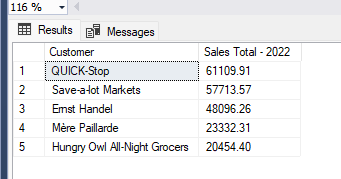

In [ ]:
SELECT TOP 5 WITH TIES cus.CompanyName as 'Customer'
     , round(cast(sum((od.UnitPrice * (1 - od.Discount)) * od.Quantity) as money),2) as 'Sales Total - 2022'
FROM dbo.OrderDetails od
	INNER JOIN dbo.Orders ord
	  ON od.OrderID = ord.OrderID
	INNER JOIN dbo.Customers cus
	  ON ord.CustomerID = cus.CustomerID
WHERE year(ord.OrderDate) = 2022
GROUP BY cus.CompanyName
ORDER BY [Sales Total - 2022] DESC
; 


---
Using just the dbo.Orders table return the top 3 countries with highest average Freight charge.

\- The query should take into account if any ties within the top 3

\- See picture below

  

**Hint**: This query will be used on a dashboard, so field names should be "user friendly" (i.e. including spaces)

      and rounding money values to two decimal places  

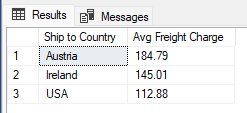

In [ ]:
SELECT Top 3 WITH TIES ShipCountry as 'Ship to Country'
     , ROUND(CAST(avg(Freight) AS money),2) as 'Avg Freight Charge'
FROM dbo.Orders
GROUP BY ShipCountry
ORDER BY [Avg Freight Charge] DESC
;


---
Using just the dbo.Customers table return a count of customers by each City where there are at LEAST 2 customers in the city

\- Ensure all cities with only one customer is filtered out

\- Sort by Customer Count, greatest to smallest

\- You should return 10 records as shown below

**Hint**: This query will be used on a dashboard, so field names should be "user friendly" (i.e. including spaces)  

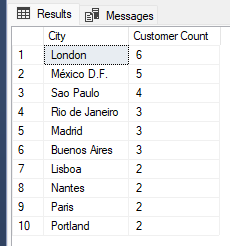


In [ ]:
SELECT City
      ,count(*) as 'Customer Count'
FROM dbo.Customers
GROUP BY City
HAVING count(*) >= 2
ORDER BY [Customer Count] DESC;

---
Using just the dbo.Products table return a list of products that need to be reordered:

\- They should be in the list if:

\- The UnitsInStock + UnitsOnOrder are less than or equal to the ReorderLevel

\- Only include items that are NOT Discontinued (1 means they are discontinued)

\- The query should return the two rows below

**Hint:** creating a reorder\_flag field within the query would be a place good start

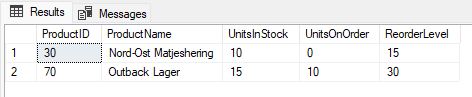

In [ ]:
WITH reorder_cte AS
(
SELECT [ProductID]
      ,[ProductName]
	  ,CASE
	    WHEN UnitsInStock + UnitsOnOrder <= ReorderLevel THEN 1
		ELSE 0
	   END as ReorderFlag
      ,[UnitsInStock]
      ,[UnitsOnOrder]
      ,[ReorderLevel]
FROM dbo.Products
WHERE Discontinued = 0
)SELECT ProductID
	   ,ProductName
	   ,UnitsInStock
	   ,UnitsOnOrder
	   ,ReorderLevel
FROM reorder_cte
WHERE ReorderFlag = 1
;

* * *

**BONUS QUERY**   (**+2 points** on your course grade if you get it **100% correct**)

Using the Orders, OrderDetails, and Customer tables, create a list of customers with the following:

\- Customers in Canada and Mexico only

\- The country field refers to the Customer Country, not Shipping Country (although I think we checked they are the same)

\- Total Sales by customer for only the year 2022 (based on the OrderDate)

\- Return the fields you see below (for Customer, this is an alias for the CompanyName field)

\- I have left the 'Country Sales' field in for clarity and a hint  :-)

\- Calculate the Pct of Sales for each Customer based on their sales to their respective country sales

\- Order the results with Customer Country in alphabetical order first and Pct of Sales - 2022 <span style="color: var(--vscode-foreground);">secondarily&nbsp;</span>    <span style="color: var(--vscode-foreground);">&nbsp;from greater to least&nbsp;</span>  

\- This query will be used on a dashboard, so field names should be "user friendly" (i.e. including spaces)

      and rounding money values to two decimal places

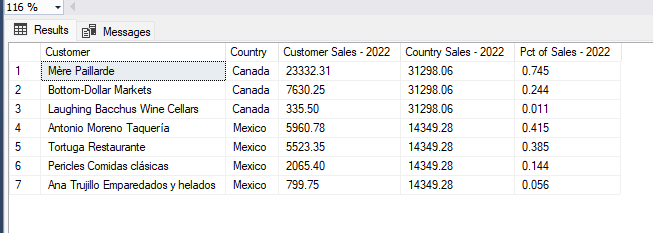



In [ ]:
WITH country_sales_CTE as
(
	SELECT cus.CompanyName as 'Customer'
		  ,cus.Country
		 ,(od.UnitPrice * (1 - od.Discount)) * od.Quantity as 'SubTotal'
		 ,sum((od.UnitPrice * (1 - od.Discount)) * od.Quantity) OVER (PARTITION BY cus.Country) as 'SalesByCountry'
	FROM dbo.OrderDetails od
		INNER JOIN dbo.Orders ord
		  ON od.OrderID = ord.OrderID
		INNER JOIN dbo.Customers cus
		  ON ord.CustomerID = cus.CustomerID
	WHERE year(ord.OrderDate) = 2022
		 AND cus.Country in ('Canada', 'Mexico')
)SELECT Customer
       ,Country
	   ,round(cast(sum(SubTotal) as money),2) as 'Customer Sales - 2022'
	   ,round(cast(min(SalesByCountry) as money),2) as 'Country Sales - 2022'
	   ,round(sum(SubTotal) / min(SalesByCountry),3) as 'Pct of Sales - 2022'
FROM country_sales_CTE
GROUP BY Customer, Country
ORDER BY Country ASC, [Pct of Sales - 2022] DESC


/* Country Total for 2022 Check 
SELECT cus.Country
       ,sum((od.UnitPrice * (1 - od.Discount)) * od.Quantity)  as 'SubTotal'
FROM dbo.OrderDetails od
	INNER JOIN dbo.Orders ord
	  ON od.OrderID = ord.OrderID
	INNER JOIN dbo.Customers cus
	  ON ord.CustomerID = cus.CustomerID
WHERE year(ord.OrderDate) = 2022
      AND cus.Country in ('Canada', 'Mexico')   
GROUP BY cus.Country
*/

# This is a header 1
1) is this one
2) is this two
3) is this three

### head<3>

- Un**oder**ed 1
- Unodered **2**
- Unodered 3

<html> 
    <strong>This is <i>between</i> two tags</strong>
</html>
